# Project 3: Skiing vs Snowboarding
## Modeling

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
# Reading in csv
ski_board = pd.read_csv('../Data/ski_board.csv')

In [3]:
# Defining custom stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
my_stop_words = ENGLISH_STOP_WORDS.union({
    'ski',
    'skiing',
    'skis',
    'snowboarding',
    'snowboard',
    'board',
    'skier',
    'skied',
    'skiers',
    'snowboards',
    'boards',
    'boarding'
})

In [4]:
# Defining our feature vectors and prediction vector
X = ski_board['text']
y = ski_board['class']

In [5]:
# Baseline accuracy
y.value_counts(normalize=True)*100

1    52.063623
0    47.936377
Name: class, dtype: float64

In [6]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Multinomial Naive Bayes

In [7]:
# Creating a pipeline that strands together the CountVectorize transformer and Multinomial Naive Bayes estimator
pipe_c = Pipeline([
    ('cvec', CountVectorizer()),
    ('clf', MultinomialNB())
])
# Creating a pipeline that strands together the TfidfVectorize transformer and the Multinomial Naive Bayes estimator
pipe_t = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

In [8]:
# Defining the parameters we want our gridsearch to test over
pipe_c_params = {
    'cvec__max_features': [100, 500, 1000],
    'cvec__stop_words': [my_stop_words],
    'cvec__ngram_range': [(1,1), (1,2)]
}
pipe_t_params = {
    'tvec__max_features': [100, 500, 1000],
    'tvec__stop_words': [my_stop_words],
    'tvec__ngram_range': [(1,1), (1,2)]
}

In [9]:
# Instantiating the GridSearchCV
gs_c = GridSearchCV(pipe_c, pipe_c_params, cv=3)
gs_t = GridSearchCV(pipe_t, pipe_t_params, cv=3)

In [10]:
# Fitting GridSearch to the training data
gs_c.fit(X_train, y_train);
gs_t.fit(X_train, y_train);

In [11]:
print('Scores Using CountVectorizer:')
print(f'Score on training set: {gs_c.score(X_train, y_train)}')
print(f'Score on testing set: {gs_c.score(X_test, y_test)}')

Scores Using CountVectorizer:
Score on training set: 0.7526055951727921
Score on testing set: 0.7209429824561403


In [12]:
print('Scores Using TfidfVectorizer:')
print(f'Score on training set: {gs_t.score(X_train, y_train)}')
print(f'Score on testing set: {gs_t.score(X_test, y_test)}')

Scores Using TfidfVectorizer:
Score on training set: 0.763210824648016
Score on testing set: 0.71875


#### Adding Title to Selftext
To improve the model, I will test a model using the column with the title and selftext combined. Hopefully this will add useful information to the model, and increase its performance.

In [46]:
# Defining our new feature to be the title and selftext combined
X = ski_board['title_text']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [47]:
# Creating a pipeline that strands together the CountVectorize transformer and Multinomial Naive Bayes estimator
pipe_c = Pipeline([
    ('cvec', CountVectorizer()),
    ('clf', MultinomialNB())
])
# Creating a pipeline that strands together the TfidfVectorize transformer and the Multinomial Naive Bayes estimator
pipe_t = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

In [48]:
# Defining the parameters we want our gridsearch to test over
pipe_c_params = {
    'cvec__max_features': [100, 500, 1000],
    'cvec__stop_words': [my_stop_words],
    'cvec__ngram_range': [(1,1), (1,2)]
}
pipe_t_params = {
    'tvec__max_features': [100, 500, 1000],
    'tvec__stop_words': [my_stop_words],
    'tvec__ngram_range': [(1,1), (1,2)]
}

In [49]:
# Instantiating the GridSearchCV
gs_c = GridSearchCV(pipe_c, pipe_c_params, cv=3)
gs_t = GridSearchCV(pipe_t, pipe_t_params, cv=3)

In [50]:
# Fitting GridSearch to the training data
gs_c.fit(X_train, y_train);
gs_t.fit(X_train, y_train);

In [51]:
print('Scores Using CountVectorizer:')
print(f'Score on training set: {gs_c.score(X_train, y_train)}')
print(f'Score on testing set: {gs_c.score(X_test, y_test)}')

Scores Using CountVectorizer:
Score on training set: 0.7613823368074603
Score on testing set: 0.7505482456140351


In [52]:
print('Scores Using TfidfVectorizer:')
print(f'Score on training set: {gs_t.score(X_train, y_train)}')
print(f'Score on testing set: {gs_t.score(X_test, y_test)}')

Scores Using TfidfVectorizer:
Score on training set: 0.772536112634851
Score on testing set: 0.7417763157894737


#### Note on Adding Title:
Adding the title did not have a large effect on the model, but it did slightly lower both the bias and the variance. This is good because this means it is likely that the title is not adding too much noise, but rather additional information. I will continue to use both the title and text.

#### Best Parameters for CountVectorizer and TfidfVectorizer:
- max_features: 1000
- ngram_range: (1,1)

#### Final Scores for the Best Multinomial Naive Bayes Model Using CountVectorizer:
- Accuracy on training set: 76.1%
- Accuracy on testing set: 75.1% 

### Random Forest

In [90]:
# Vectorizing our features using CountVectorizer
cvec = CountVectorizer(max_features=1000, stop_words=my_stop_words)
X_train_cvec = cvec.fit_transform(X_train)
X_test_cvec = cvec.transform(X_test)

In [91]:
# Vectorizing our features using TfidfVectorizer
tvec = TfidfVectorizer(max_features=1000, stop_words=my_stop_words)
X_train_tvec = tvec.fit_transform(X_train)
X_test_tvec = tvec.transform(X_test)

In [92]:
# Instantiating RandomForestClassifier
rf_c = RandomForestClassifier(random_state=42)
rf_t = RandomForestClassifier(random_state=42)

In [93]:
# Defining the parameters we want our gridsearch to test over
rf_c_params={
    'n_estimators': [100,150,200],
    'max_depth': [1,2,3,4,5],
    'min_samples_split': [2,4,6]
}
rf_t_params={
    'n_estimators': [100,150,200],
    'max_depth': [1,2,3,4,5],
    'min_samples_split': [2,4,6]
}

In [94]:
# Instantiating the GridSearchCV
gs_c = GridSearchCV(rf_c, rf_c_params, cv=3)
gs_t = GridSearchCV(rf_t, rf_t_params, cv=3)

# Fitting GridSearch to the training data
gs_c.fit(X_train_cvec, y_train);
gs_t.fit(X_train_tvec, y_train);

In [95]:
print('Scores Using CountVectorizer:')
print(f'Score on training set: {gs_c.score(X_train_cvec, y_train)}')
print(f'Score on testing set: {gs_c.score(X_test_cvec, y_test)}')

Scores Using CountVectorizer:
Score on training set: 0.7193271164746754
Score on testing set: 0.6990131578947368


In [96]:
print('Scores Using TfidfVectorizer:')
print(f'Score on training set: {gs_t.score(X_train_tvec, y_train)}')
print(f'Score on testing set: {gs_t.score(X_test_tvec, y_test)}')

Scores Using TfidfVectorizer:
Score on training set: 0.7281038581093435
Score on testing set: 0.7083333333333334


#### Note:
It seems there is hardly a difference between CountVectorizer and TfidfVectorizer. Each performed about the same on both the Naive Bays model and the Random Forest model. 

In [97]:
# Checking the best parameters using CountVectorizer
gs_c.best_params_

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}

In [98]:
# Checking the best parameters using TfidfVectorizer
gs_t.best_params_

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 150}

In [99]:
# Defining our best estimator
rf = gs_t.best_estimator_

In [100]:
# Sorting the most important features
pd.Series(data=rf.feature_importances_,index=cvec.get_feature_names()).sort_values(ascending=False).head(25)

burton      0.092705
ride        0.082086
riding      0.077457
size        0.036509
pair        0.035805
rider       0.034652
capita      0.033160
camber      0.032085
atomic      0.022204
park        0.020930
shred       0.019844
arbor       0.014697
bindings    0.014440
gnu         0.014364
lib         0.014033
piste       0.013874
touring     0.013024
union       0.011739
jumps       0.009921
rode        0.009389
orca        0.009349
mm          0.008824
crows       0.008709
alta        0.008139
ridden      0.007551
dtype: float64

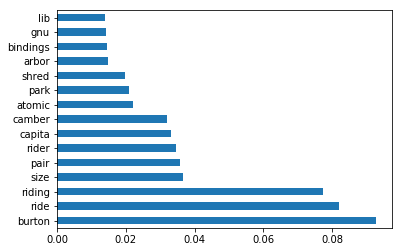

In [101]:
# Plotting the most important features
pd.Series(data=rf.feature_importances_,
          index=cvec.get_feature_names()).sort_values(ascending=False).head(15).plot(kind='barh',
                                                                                    fontsize=10)

#### Best Parameters for Random Forest:
- n_estimators: 150
- max_depth: 5
- min_samples_split: 2

#### Final Scores for the Best Random Forest Model Using TfidfVectorizer:
- Accuracy on the training set: 72.8%
- Accuracy on the testing set: 70.8%

#### Final Scores for the Best Random Forest Model Using TfidfVectorizer and English Stop Words:
- Accuracy on training set: 87%
- Accuracy on testing set: 86% 

### Support Vector Machine

In [31]:
# Instantiating SVM
# svc = SVC(random_state=42)

# Defining parameters to search over
# svc_params = {
    #'C': np.logspace(-3, 2, 20),
#     'C': [.01, 1, 2, 5, 10, 25],
#     'kernel': ['linear', 'poly', 'sigmoid', 'rbf']
# }

In [32]:
# Instantiating GridSearchCV
# gs_c = GridSearchCV(svc, param_grid=svc_params, cv=3)
# gs_t = GridSearchCV(svc, param_grid=svc_params, cv=3)

# # Fitting the models
# gs_c.fit(X_train_cvec, y_train)
# gs_t.fit(X_train_tvec, y_train)

#### Note on Support Vector Machine:
For some reason, my support vector machine model was taking way too long to fit. I waited over an hour and it did not fit. I'm only fitting 144 models, so I did not expect it to take so long. I would like to explore this further at a later date.